### Chapter 5.2_recommendation

#### < UK Retail dataset >

- InvoiceNo : 거래 고유 번호 
- StockCode : 상품 고유 번호
- Description : 상품명
- Quantity : 거래 수량
- InvoiceDate : 거래 일시
- UnitPrice : 상품 단가
- CustomerID : 구매자 고유 번호
- Country : 구매 국가

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data/online_retail.csv', 
                 dtype = {'CustomerID': str, 'InvoiceNo': str}, 
                 encoding = 'ISO-8859-1')

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format="%m/%d/%Y %H:%M")

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB
None


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [3]:
### 결측치 제거 
print(df.isnull().sum())
print('----------------------------')
print(df.shape)
print('----------------------------')

df = df.dropna()
print(df.isnull().sum())
print('----------------------------')
print(df.shape)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
----------------------------
(541909, 8)
----------------------------
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64
----------------------------
(406829, 8)


In [4]:
### 이상값 제거 
df = df[df['Quantity']>0]    ## 판매량이 0 이하 제거 
df = df[df['UnitPrice']>0]   ## 가격이 0 이하 제거 

In [5]:
df['ContainDigit'] = df['StockCode'].apply(lambda x: any(c.isdigit() for c in x))

## 상품코드에 숫자가 포함되지 않은 것들도 존재하나? 
yyy = df[df['ContainDigit'] == False]
yyy

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,ContainDigit
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583,France,False
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.00,12791,Netherlands,False
1123,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.00,12662,Germany,False
2239,536569,M,Manual,1,2010-12-01 15:35:00,1.25,16274,United Kingdom,False
2250,536569,M,Manual,1,2010-12-01 15:35:00,18.95,16274,United Kingdom,False
...,...,...,...,...,...,...,...,...,...
541198,581493,POST,POSTAGE,1,2011-12-09 10:10:00,15.00,12423,Belgium,False
541216,581494,POST,POSTAGE,2,2011-12-09 10:13:00,18.00,12518,Germany,False
541730,581570,POST,POSTAGE,1,2011-12-09 11:59:00,18.00,12662,Germany,False
541767,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18.00,12526,Germany,False


In [6]:
## 상품코드는 숫자를 포함하고 있어야 한다.  
df = df[df['ContainDigit'] == True]

print(df.shape)
df.head()

(396470, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,ContainDigit
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,True
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,True
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,True
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,True
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,True


#### Step 1. EDA 

In [10]:
## 데이터의 기간은 언제부터 언제까지 인가? 
df['date'] = df['InvoiceDate'].dt.date

print('Start Day: ', df['date'].min())
print('End Day: ', df['date'].max())

Start Day:  2010-12-01
End Day:  2011-12-09


date
2010-12-01    24208
2010-12-02    31140
2010-12-03    11822
2010-12-05    16370
2010-12-06    16269
              ...  
2011-12-05    37610
2011-12-06    27798
2011-12-07    41080
2011-12-08    27536
2011-12-09    90573
Name: Quantity, Length: 305, dtype: int64


<AxesSubplot:xlabel='date'>

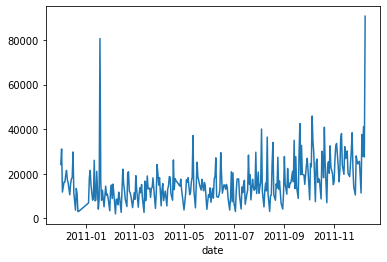

In [13]:
## 일자별 거래량 추이를 살펴보자 
date_quantity_series = df.groupby('date')['Quantity'].sum()
print(date_quantity_series)
date_quantity_series.plot()

date
2010-12-01    121
2010-12-02    136
2010-12-03     57
2010-12-05     87
2010-12-06     94
             ... 
2011-12-05    115
2011-12-06    110
2011-12-07    103
2011-12-08    113
2011-12-09     41
Name: InvoiceNo, Length: 305, dtype: int64


<AxesSubplot:xlabel='date'>

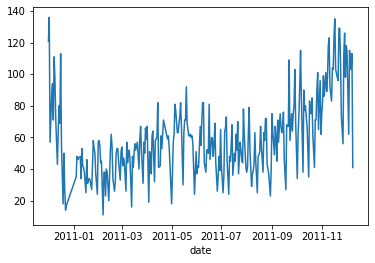

In [16]:
## 일자별 거래 건수 추이를 살펴보자 
date_transaction_series = df.groupby('date')['InvoiceNo'].nunique()
print(date_transaction_series)
date_transaction_series.plot()

date
2010-12-01     939
2010-12-02     905
2010-12-03     671
2010-12-05    1140
2010-12-06     914
              ... 
2011-12-05    1405
2011-12-06    1141
2011-12-07    1044
2011-12-08    1143
2011-12-09     456
Name: StockCode, Length: 305, dtype: int64


<AxesSubplot:xlabel='date'>

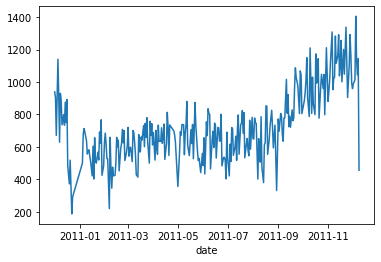

In [17]:
## 일자별 거래된 상품수량  추이를 살펴보자 
date_items_series = df.groupby('date')['StockCode'].nunique()
print(date_items_series)
date_items_series.plot()

In [19]:
## 고객은 총 몇명인가? 
len(df['CustomerID'].unique())

4334

CustomerID
12346     1
12347     7
12348     4
12349     1
12350     1
         ..
18280     1
18281     1
18282     2
18283    16
18287     3
Name: InvoiceNo, Length: 4334, dtype: int64


<AxesSubplot:xlabel='InvoiceNo', ylabel='Density'>

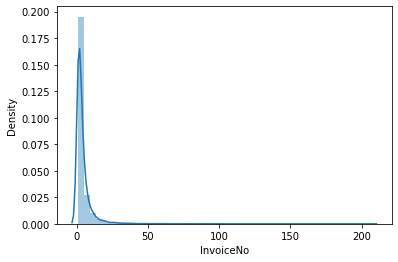

In [31]:
## 고객 1인당 거래횟수 분포는? 
customer_unique_transaction_series = df.groupby('CustomerID')['InvoiceNo'].nunique()
print(customer_unique_transaction_series)
sns.distplot(customer_unique_transaction_series)

CustomerID
12346      1
12347    103
12348     21
12349     72
12350     16
        ... 
18280     10
18281      7
18282     12
18283    262
18287     59
Name: StockCode, Length: 4334, dtype: int64


<AxesSubplot:xlabel='StockCode', ylabel='Density'>

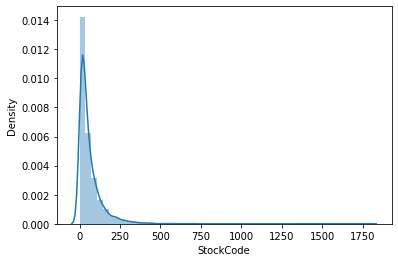

In [35]:
## 고객 1인당 거래 상품 수 분포는? 
customer_unique_items_series = df.groupby('CustomerID')['StockCode'].nunique()
print(customer_unique_items_series)
sns.distplot(customer_unique_items_series)

In [45]:
### mini test : Q&A 
print('1. 총 상품갯수 : ', df['StockCode'].nunique())
print('--------------------------------------------------------------------')
print('2. 거래량 top 10 : ', df.groupby('StockCode')['InvoiceNo'].nunique().sort_values(ascending=False)[:10])

1. 총 상품갯수 :  3660
--------------------------------------------------------------------
2. 거래량 top 10 :  StockCode
85123A    1978
22423     1703
85099B    1600
47566     1379
84879     1375
20725     1289
22720     1146
23203     1080
20727     1052
22383     1043
Name: InvoiceNo, dtype: int64


3. 상품별 판매수량 분포 :


<AxesSubplot:xlabel='Quantity', ylabel='Density'>

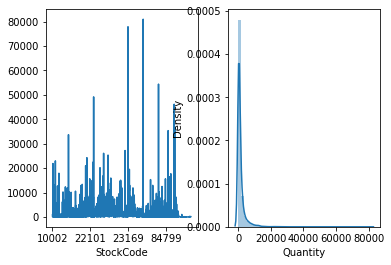

In [68]:
print('3. 상품별 판매수량 분포 :')

a = df.groupby('StockCode')['Quantity'].sum()

fig, ax = plt.subplots(ncols=2)
a.plot(ax=ax[0])
sns.distplot(a, ax=ax[1])

4. 거래별 판매금액 분포 :


<AxesSubplot:xlabel='amount', ylabel='Density'>

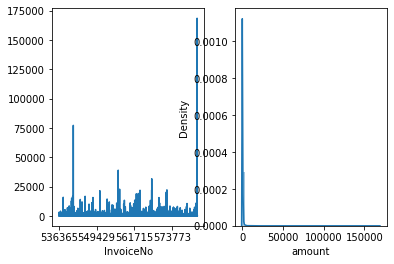

In [75]:
print('4. 거래별 판매금액 분포 :')
df['amount'] = df['Quantity'] * df['UnitPrice']
b = df.groupby('InvoiceNo')['amount'].sum()

fig, ax = plt.subplots(ncols=2)
b.plot(ax=ax[0])
sns.distplot(b, ax=ax[1])

#### Step 2. Split the data
- 1~11월 동안의 구매패턴에 의거하여, 연말(12월)의 구매를 예측한다. 
- 11/1일을 기준으로 데이터를 분리한다. 

In [80]:
import datetime

df_year_round = df[df['date'] < datetime.date(2011, 11, 1)]
df_year_end = df[df['date'] >= datetime.date(2011, 11, 1)]

print(df_year_round.shape)
print(df_year_end.shape)

(314902, 11)
(81568, 11)


In [83]:
## 평시(1~10월) 데이터에서 유저별 구매상품 리스트 추출
customer_items_round_set = df_year_round.groupby('CustomerID')['StockCode'].apply(set)
customer_items_round_set

CustomerID
12346                                              {23166}
12347    {51014C, 23316, 22550, 84991, 23170, 21578, 84...
12348    {23077, 84991, 21980, 21725, 21726, 21983, 849...
12350    {21908, 22412, 22551, 22620, 21864, 20652, 223...
12352    {22722, 37495, 22779, 22979, 22550, 22120, 227...
                               ...                        
18280    {22467, 82484, 22495, 22725, 22499, 22084, 223...
18281    {22467, 23008, 22028, 22716, 23007, 22037, 23209}
18282    {21270, 21108, 23295, 22424, 21109, 23187, 22089}
18283    {20979, 22577, 21717, 23352, 22550, 23318, 849...
18287    {22144, 21014, 22866, 84584, 23269, 23077, 850...
Name: StockCode, Length: 3970, dtype: object

In [96]:
## 연말(11~12월) 데이터에서 유저별 구매상품 리스트 추출
customer_items_end_set = df_year_end.groupby('CustomerID')['StockCode'].apply(set)
customer_items_end_set

CustomerID
12347    {21731, 21064, 20719, 21265, 84625A, 23271, 23...
12349    {23514, 48185, 22722, 21411, 22601, 23295, 234...
12352    {23088, 23089, 23096, 22978, 22635, 22178, 226...
12356                                       {22423, 21843}
12357    {22027, 21411, 15056BL, 21116, 23316, 22712, 2...
                               ...                        
18272    {22722, 22074, 22965, 22960, 22969, 22076, 229...
18273                                             {79302M}
18274    {84509A, 22423, 21974, 21108, 23243, 22851, 23...
18282                  {22423, 22699, 22818, 23175, 23174}
18283    {22738, 23381, 23318, 23581, 84991, 23379, 849...
Name: StockCode, Length: 1904, dtype: object

- <font color = 'yellow'> < customer & stock dict 생성 > </font>
- old : 1~10월에만 구매 
- new : 11~12월에만 구매 
- both : old, new 모두 구매 

In [95]:
## customer & Stock dict : 평시 구매상품에 old 표시 
customer_items_dict = {}

for customer_id, stocks in customer_items_round_set.items() : 
    customer_items_dict[customer_id] = {}
    for stock_code in stocks : 
        customer_items_dict[customer_id][stock_code] = 'old'
        
print(str(customer_items_dict)[:100] + '...')

{'12346': {'23166': 'old'}, '12347': {'51014C': 'old', '23316': 'old', '22550': 'old', '84991': 'old...


In [98]:
for customer_id, stocks in customer_items_end_set.items():    
    
    if customer_id in customer_items_dict:  # 11월 이전 구매기록이 있는 유저 체크
        for stock_code in stocks:
            # 구매한 적 있는 상품인지를 체크한 뒤, 상태 표기 
            if stock_code in customer_items_dict[customer_id]:
                customer_items_dict[customer_id][stock_code] = 'both'
            else:
                customer_items_dict[customer_id][stock_code] = 'new'
        
    else:   # 11월 이전 구매기록 없음 --> 'new'
        customer_items_dict[customer_id] = {}
        for stock_code in stocks:
            customer_items_dict[customer_id][stock_code] = 'new'

print(str(customer_items_dict)[:100] + "...")

{'12346': {'23166': 'old'}, '12347': {'51014C': 'old', '23316': 'old', '22550': 'old', '84991': 'old...


In [100]:
# 'old', 'new', 'both'를 유저별로 탐색하여 데이터 프레임 생성
columns = ['CustomerID', 'old', 'new', 'both']
df_order_info = pd.DataFrame(columns=columns)


for customer_id in customer_items_dict:
    old = 0
    new = 0
    both = 0
    
    # 딕셔너리의 상품 상태(old, new, both)를 체크하여 데이터 프레임에 append 할 수 있는 형태로 처리
    for stock_code in customer_items_dict[customer_id]:
        status = customer_items_dict[customer_id][stock_code]
        if status == 'old':
            old += 1
        elif status == 'new':
            new += 1
        else:
            both += 1
    
    # df_order_info에 데이터를 append
    row = [customer_id, old, new, both]
    series = pd.Series(row, index=columns)
    df_order_info = df_order_info.append(series, ignore_index=True)

df_order_info.head()

,CustomerID,old,new,both
0,12346,1,0,0
1,12347,92,3,8
2,12348,21,0,0
3,12350,16,0,0
4,12352,43,12,2


In [103]:
tot_customer = df_order_info.shape[0]
print('1. 전체 customer 수 : ', tot_customer)

1. 전체 customer 수 :  4334


In [109]:
new_buy = df_order_info[(df_order_info['old'] > 0) 
                        & (df_order_info['new'] > 0) ]


new_buy_n = new_buy.shape[0]
print('2. 연말 신규상품 구매자 수 : ', new_buy_n)

2. 연말 신규상품 구매자 수 :  1446


In [112]:
re_buy = df_order_info[df_order_info['both'] > 0 ]
re_buy_n = re_buy.shape[0]
print('3. 연말 기존상품 재구매자 수 : ', re_buy_n)

3. 연말 기존상품 재구매자 수 :  1426


In [116]:
## 연말 신규상품 구매자들은 얼마나 많은 종류의 신규상품을 구매하는가? 
how_many_new = df_order_info['new'].value_counts()
print(how_many_new.head())

0    2521
1      81
3      73
2      72
8      65
Name: new, dtype: int64


In [118]:
## index 부분은 제외하고, value 부분에 대해서만 통계량 계산 
how_many_new[1:].describe()

count    132.000000
mean      13.734848
std       19.130672
min        1.000000
25%        1.000000
50%        5.000000
75%       16.000000
max       81.000000
Name: new, dtype: float64

#### Step 3. 상품구매 예측 with SVD
- 추천을 위해서는 user의 개별 상품에 대한 선호도 데이터가 필요하다. (영화추천에서의 별점과 같은) 
- 여기서는 구매횟수를 기준으로 선호도 변수를 생성한다. 

In [120]:
print('추천대상 User 인원수 : ', len(df_year_round['CustomerID'].unique()))
print('추천대상 상품 갯수', len(df_year_round['StockCode'].unique()))

추천대상 User 인원수 :  3970
추천대상 상품 갯수 3608


  CustomerID StockCode  InvoiceNo
0      12346     23166          1
1      12347     16008          1
2      12347     17021          1
3      12347     20665          1
4      12347     20719          3


<AxesSubplot:xlabel='InvoiceNo', ylabel='Density'>

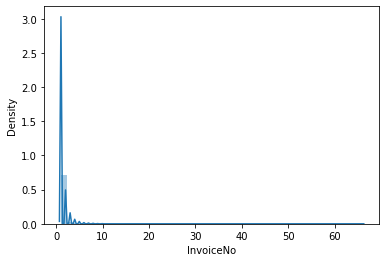

In [127]:
## user별 구매횟수를 선호도로써 사용 가능한가? 
uir_df = df_year_round.groupby(['CustomerID', 'StockCode'])['InvoiceNo'].nunique().reset_index()
print(uir_df.head())
sns.distplot(uir_df['InvoiceNo'])

0         1.000000
1         1.000000
2         1.000000
3         1.000000
4         1.477121
            ...   
220902    1.000000
220903    1.301030
220904    1.301030
220905    1.000000
220906    1.000000
Name: InvoiceNo, Length: 220907, dtype: float64


<AxesSubplot:xlabel='InvoiceNo', ylabel='Density'>

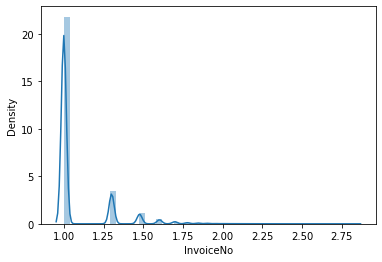

In [131]:
## 데이터가 편향되어 있다 --> Log nomalization 
aa = uir_df['InvoiceNo'].apply(lambda x: np.log10(x)+1)
print(aa)
sns.distplot(aa[1:])

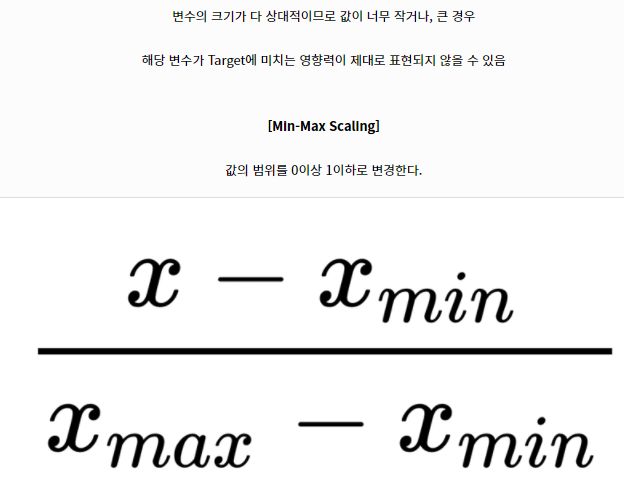

In [134]:
from IPython.display import Image
Image('img/scaling.PNG')

<AxesSubplot:xlabel='Rating', ylabel='Density'>

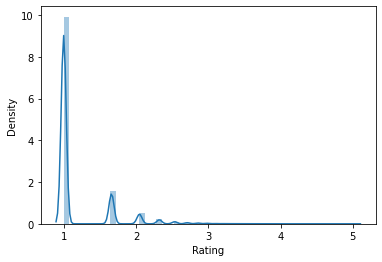

In [132]:
## log normalization된 값을, 1~5점으로 변환 
uir_df['Rating'] = uir_df['InvoiceNo'].apply(lambda x: np.log10(x)+1)

uir_df['Rating'] = ((uir_df['Rating'] - uir_df['Rating'].min()) / 
                    (uir_df['Rating'].max() - uir_df['Rating'].min()) * 4) + 1

sns.distplot(uir_df['Rating'])

In [136]:
## making dataset for SVD 
uir_df = uir_df[['CustomerID', 'StockCode', 'Rating']]
print(uir_df.shape)
uir_df.head()

(220907, 3)


,CustomerID,StockCode,Rating
0,12346,23166,1.000000
1,12347,16008,1.000000
2,12347,17021,1.000000
3,12347,20665,1.000000
4,12347,20719,2.048881


In [137]:
import time
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split

# SVD 라이브러리를 사용하기 위한 학습 데이터를 생성합니다. 대략적인 성능을 알아보기 위해 학습 데이터와 테스트 데이터를 8:2로 분할합니다.
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(uir_df[['CustomerID', 'StockCode', 'Rating']], reader)
train_data, test_data = train_test_split(data, test_size=0.2)

# SVD 모델을 학습합니다.
train_start = time.time()
model = SVD(n_factors=8,
            lr_all=0.005,
            reg_all=0.02,
            n_epochs=200)
model.fit(train_data)
train_end = time.time()
print("training time of model: %.2f seconds" % (train_end - train_start))

predictions = model.test(test_data)

# 테스트 데이터의 RMSE를 출력하여 모델의 성능을 평가합니다.
print("RMSE of test dataset in SVD model:")
accuracy.rmse(predictions)

training time of model: 27.22 seconds
RMSE of test dataset in SVD model:
RMSE: 0.3360


0.3360304076217338

#### Step 4. 상품추천 simulation

In [138]:
# SVD 라이브러리를 사용하기 위한 학습 데이터를 생성합니다. 11월 이전 전체를 full trainset으로 활용합니다.
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(uir_df[['CustomerID', 'StockCode', 'Rating']], reader)
train_data = data.build_full_trainset()

# SVD 모델을 학습합니다.
train_start = time.time()
model = SVD(n_factors=8,
            lr_all=0.005,
            reg_all=0.02,
            n_epochs=200)
model.fit(train_data)
train_end = time.time()
print("training time of model: %.2f seconds" % (train_end - train_start))

training time of model: 28.46 seconds


- 11월 이전 구매이력이 있는 모든 유저 대상 상품 추천 
- 1) 구매이력 없는 상품 : 신규 구매 타겟 
- 2) 구매이력 있는 상품 : 재구매 타겟 
- 3) 모든상품 : 상품 선호도 점수를 고려 

In [139]:
"""
11월 이전 데이터에서 유저-상품에 대한 Rating을 기반으로 추천 상품을 선정합니다.

1. 이전에 구매하지 않았던 상품 추천 : anti_build_testset()을 사용합니다.
2. 이전에 구매했던 상품 다시 추천 : build_testset()을 사용합니다.
3. 모든 상품을 대상으로 하여 상품 추천
"""

# 이전에 구매하지 않았던 상품을 예측의 대상으로 선정합니다.
test_data = train_data.build_anti_testset()
target_user_predictions = model.test(test_data)

# 구매 예측 결과를 딕셔너리 형태로 변환합니다.
new_order_prediction_dict = {}
for customer_id, stock_code, _, predicted_rating, _ in target_user_predictions:
    if customer_id in new_order_prediction_dict:
        if stock_code in new_order_prediction_dict[customer_id]:
            pass
        else:
            new_order_prediction_dict[customer_id][stock_code] = predicted_rating
    else:
        new_order_prediction_dict[customer_id] = {}
        new_order_prediction_dict[customer_id][stock_code] = predicted_rating

print(str(new_order_prediction_dict)[:300] + "...")

{'12346': {'16008': 1.041388163508499, '17021': 1.2313813678818186, '20665': 1.0464911479916053, '20719': 1.2743119133076, '20780': 1, '20782': 1.1418524202569449, '20966': 1.0879502437016404, '21035': 1.0875929772209387, '21041': 1, '21064': 1.1674948837522467, '21154': 1.0652441302057678, '21171':...


In [140]:
# 이전에 구매했었던 상품을 예측의 대상으로 선정합니다.
test_data = train_data.build_testset()
target_user_predictions = model.test(test_data)

# 구매 예측 결과를 딕셔너리 형태로 변환합니다.
reorder_prediction_dict = {}
for customer_id, stock_code, _, predicted_rating, _ in target_user_predictions:
    if customer_id in reorder_prediction_dict:
        if stock_code in reorder_prediction_dict[customer_id]:
            pass
        else:
            reorder_prediction_dict[customer_id][stock_code] = predicted_rating
    else:
        reorder_prediction_dict[customer_id] = {}
        reorder_prediction_dict[customer_id][stock_code] = predicted_rating
        
print(str(reorder_prediction_dict)[:300] + "...")

{'12346': {'23166': 1.038275556061413}, '12347': {'16008': 1, '17021': 1.4044835439704249, '20665': 1.0703644693970769, '20719': 2.1327326186751665, '20780': 1.2950932414083156, '20782': 1.3045076714596489, '20966': 1.4460162355431023, '21035': 1.458502728260047, '21041': 1.200484449852132, '21064':...


In [141]:
# 두 딕셔너리를 하나로 통합합니다.
total_prediction_dict = {}

# new_order_prediction_dict 정보를 새로운 딕셔너리에 저장합니다.
for customer_id in new_order_prediction_dict:
    if customer_id not in total_prediction_dict:
        total_prediction_dict[customer_id] = {}
    for stock_code, predicted_rating in new_order_prediction_dict[customer_id].items():
        if stock_code not in total_prediction_dict[customer_id]:
            total_prediction_dict[customer_id][stock_code] = predicted_rating
            
# reorder_prediction_dict 정보를 새로운 딕셔너리에 저장합니다.
for customer_id in reorder_prediction_dict:
    if customer_id not in total_prediction_dict:
        total_prediction_dict[customer_id] = {}
    for stock_code, predicted_rating in reorder_prediction_dict[customer_id].items():
        if stock_code not in total_prediction_dict[customer_id]:
            total_prediction_dict[customer_id][stock_code] = predicted_rating
            
print(str(total_prediction_dict)[:300] + "...")

{'12346': {'16008': 1.041388163508499, '17021': 1.2313813678818186, '20665': 1.0464911479916053, '20719': 1.2743119133076, '20780': 1, '20782': 1.1418524202569449, '20966': 1.0879502437016404, '21035': 1.0875929772209387, '21041': 1, '21064': 1.1674948837522467, '21154': 1.0652441302057678, '21171':...


In [142]:
# 11월 이후의 데이터를 테스트 데이터셋으로 사용하기 위한 데이터프레임을 생성합니다.
simulation_test_df = df_year_end.groupby('CustomerID')['StockCode'].apply(set).reset_index()
simulation_test_df.columns = ['CustomerID', 'RealOrdered']
simulation_test_df.head()

,CustomerID,RealOrdered
0,12347,"{21731, 21064, 20719, 21265, 84625A, 23271, 23..."
1,12349,"{23514, 48185, 22722, 21411, 22601, 23295, 234..."
2,12352,"{23088, 23089, 23096, 22978, 22635, 22178, 226..."
3,12356,"{22423, 21843}"
4,12357,"{22027, 21411, 15056BL, 21116, 23316, 22712, 2..."


In [143]:
# 이 데이터프레임에 상품 추천 시뮬레이션 결과를 추가하기 위한 함수를 정의합니다.
def add_predicted_stock_set(customer_id, prediction_dict):
    if customer_id in prediction_dict:
        predicted_stock_dict = prediction_dict[customer_id]
        # 예측된 상품의 Rating이 높은 순으로 정렬합니다.
        sorted_stocks = sorted(predicted_stock_dict, key=lambda x : predicted_stock_dict[x], reverse=True)
        return sorted_stocks
    else:
        return None

# 상품 추천 시뮬레이션 결과를 추가합니다.
simulation_test_df['PredictedOrder(New)'] = simulation_test_df['CustomerID']. \
                                            apply(lambda x: add_predicted_stock_set(x, new_order_prediction_dict))
simulation_test_df['PredictedOrder(Reorder)'] = simulation_test_df['CustomerID']. \
                                            apply(lambda x: add_predicted_stock_set(x, reorder_prediction_dict))
simulation_test_df['PredictedOrder(Total)'] = simulation_test_df['CustomerID']. \
                                            apply(lambda x: add_predicted_stock_set(x, total_prediction_dict))
simulation_test_df.head()

,CustomerID,RealOrdered,PredictedOrder(New),PredictedOrder(Reorder),PredictedOrder(Total)
0,12347,"{21731, 21064, 20719, 21265, 84625A, 23271, 23...","[22197, 82484, 37448, 22059, 22328, 85152, 220...","[21731, 20719, 22726, 22729, 22728, 22727, 224...","[22197, 82484, 37448, 22059, 22328, 85152, 220..."
1,12349,"{23514, 48185, 22722, 21411, 22601, 23295, 234...",None,None,None
2,12352,"{23088, 23089, 23096, 22978, 22635, 22178, 226...","[84086B, 90119, 90042A, 90035A, 85131D, 22970,...","[22423, 22779, 22780, 22654, 22138, 84050, 225...","[84086B, 90119, 90042A, 90035A, 85131D, 22970,..."
3,12356,"{22423, 21843}","[84086B, 90119, 90035A, 85099B, 90042A, 85131B...","[22423, 21843, 22699, 21080, 22698, 37450, 210...","[84086B, 90119, 90035A, 85099B, 90042A, 85131B..."
4,12357,"{22027, 21411, 15056BL, 21116, 23316, 22712, 2...",None,None,None


#### Step 5. Validation
- 추천 시뮬레이션 결과와 실제 구매와 비교 

In [144]:
# 구매 예측의 상위 k개의 recall(재현율)을 평가 기준으로 정의합니다.
def calculate_recall(real_order, predicted_order, k):
    # 만약 추천 대상 상품이 없다면, 11월 이후에 상품을 처음 구매하는 유저입니다.
    if predicted_order is None:
        return None
    
    # SVD 모델에서 현재 유저의 Rating이 높은 상위 k개의 상품을 "구매 할 것으로 예측"합니다.
    predicted = predicted_order[:k]
    true_positive = 0
    for stock_code in predicted:
        if stock_code in real_order:
            true_positive += 1
    
    # 예측한 상품 중, 실제로 유저가 구매한 상품의 비율(recall)을 계산합니다.
    recall = true_positive / len(predicted)
    return recall

# 시뮬레이션 대상 유저에게 상품을 추천해준 결과를 평가합니다.
simulation_test_df['top_k_recall(Reorder)'] = simulation_test_df. \
                                                apply(lambda x: calculate_recall(x['RealOrdered'], 
                                                                                 x['PredictedOrder(Reorder)'], 
                                                                                 5), axis=1)
simulation_test_df['top_k_recall(New)'] = simulation_test_df. \
                                                apply(lambda x: calculate_recall(x['RealOrdered'], 
                                                                                 x['PredictedOrder(New)'], 
                                                                                 5), axis=1)
simulation_test_df['top_k_recall(Total)'] = simulation_test_df. \
                                                apply(lambda x: calculate_recall(x['RealOrdered'], 
                                                                                 x['PredictedOrder(Total)'], 
                                                                                 5), axis=1)

In [145]:
# 평가 결과를 유저 평균으로 살펴봅니다.
print(simulation_test_df['top_k_recall(Reorder)'].mean())
print(simulation_test_df['top_k_recall(New)'].mean())
print(simulation_test_df['top_k_recall(Total)'].mean())

0.31581168831168827
0.006753246753246752
0.06870129870129871


##### <font color = 'yellow'> --> 평균재현도 비교 : 재구매 31.6% > 신규구매 6.8% </font>

In [147]:
# 평가 결과를 점수 기준으로 살펴봅니다.
simulation_test_df['top_k_recall(Reorder)'].value_counts()

0.000000    466
0.200000    388
0.400000    274
0.600000    198
0.800000    117
1.000000     78
0.500000      7
0.250000      6
0.666667      4
0.750000      1
0.333333      1
Name: top_k_recall(Reorder), dtype: int64

##### <font color = 'yellow'> --> 466명 : 추천시 재구매 확률 0%  </font>
##### <font color = 'yellow'> --> 388명 : 추천시 재구매 확률 20% </font>
##### <font color = 'yellow'> --> 274명 : 추천시 재구매 확률 40% ...</font>

In [149]:
### 신규상품 추천시 결과 
simulation_test_df['top_k_recall(New)'].value_counts()

0.0    1492
0.2      44
0.4       4
Name: top_k_recall(New), dtype: int64

In [150]:
### 전체상품 추천시 결과 
simulation_test_df['top_k_recall(Total)'].value_counts()

0.0    1222
0.2     191
0.4      73
0.6      32
0.8      14
1.0       8
Name: top_k_recall(Total), dtype: int64

In [151]:
### final : 연말 선물로 구매할것 같은 상품 추천하기 
k = 5
result_df = simulation_test_df[simulation_test_df['PredictedOrder(Reorder)'].notnull()]
result_df['PredictedOrder(Reorder)'] = result_df['PredictedOrder(Reorder)'].\
                                                        apply(lambda x: x[:k])
result_df = result_df[['CustomerID', 'RealOrdered', 
                       'PredictedOrder(Reorder)', 'top_k_recall(Reorder)']]
result_df.columns = [['구매자ID', '실제주문', '5개추천결과', 'Top5추천_주문재현도']]
result_df.sample(5).head()

,구매자ID,실제주문,5개추천결과,Top5추천_주문재현도
790,14765,"{22144, 22722, 22959, 20983, 21592, 22734, 217...","[21034, 82482, 21280, 22428, 22456]",0.2
398,13546,"{22233, 37449, 23096, 22063, 22086, 21080, 234...","[22424, 21080, 22667, 21156, 21212]",0.4
1196,16085,"{22144, 21892, 22086, 82483, 22142, 84949, 840...","[85123A, 21914, 22960, 22469, 22961]",0.4
413,13592,"{22745, 20969, 22139}","[15036, 21843, 22423, 22725, 22149]",0.0
485,13838,"{22992, 85034C, 22722, 23295, 20986, 23350, 22...","[82600, 22118, 48194, 85099B, 22665]",0.0


In [152]:
### cf. 추천해봤자 소용없는 고객 명단 
not_recommended_df = simulation_test_df[simulation_test_df['PredictedOrder(Reorder)'].isnull()]
print(not_recommended_df.shape)
not_recommended_df.head()

(364, 8)


,CustomerID,RealOrdered,PredictedOrder(New),PredictedOrder(Reorder),PredictedOrder(Total),top_k_recall(Reorder),top_k_recall(New),top_k_recall(Total)
1,12349,"{23514, 48185, 22722, 21411, 22601, 23295, 234...",None,None,None,NaN,NaN,NaN
4,12357,"{22027, 21411, 15056BL, 21116, 23316, 22712, 2...",None,None,None,NaN,NaN,NaN
8,12367,"{21770, 85227, 21579, 22631, 22708, 16237, 226...",None,None,None,NaN,NaN,NaN
9,12374,"{22144, 22732, 46775D, 22112, 21788, 22955, 84...",None,None,None,NaN,NaN,NaN
15,12391,"{22562, 22209, 22144, 22210, 22809, 22563, 232...",None,None,None,NaN,NaN,NaN
